<a href="https://colab.research.google.com/github/taliamora/lab-2-phase-2-taliamora/blob/main/DATA_301_Lab_2A_(Phase2)_TALIA_MORA%2C_KITTY_ZHUANG%2C_MICHAEL_GREENE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](http://abc.go.com/shows/shark-tank) to get a sense of how it works.

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [1]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `https://dlsun.github.io/pods/data/sharktank.csv`. Read in the data into a Pandas `DataFrame`.



In [2]:
tank = pd.read_csv("https://dlsun.github.io/pods/data/sharktank.csv")
tank

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [3]:
tank[['Corcoran','Cuban','Greiner','Herjavec','John','O\'Leary','Harrington','Guest']] = tank[['Corcoran','Cuban','Greiner','Herjavec','John','O\'Leary','Harrington','Guest']].fillna(0)
tank

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [4]:
tank['Amount'] = tank['Amount'].str.replace("[$,]","")
tank['Equity'] = tank['Equity'].str.replace("%","")
tank[['Amount','Equity']]=tank[['Amount','Equity']].apply(pd.to_numeric)
tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               495 non-null    float64
 1   No. in series        495 non-null    float64
 2   Company              495 non-null    object 
 3   Deal                 495 non-null    object 
 4   Industry             495 non-null    object 
 5   Entrepreneur Gender  495 non-null    object 
 6   Amount               249 non-null    float64
 7   Equity               245 non-null    float64
 8   Corcoran             495 non-null    float64
 9   Cuban                495 non-null    float64
 10  Greiner              495 non-null    float64
 11  Herjavec             495 non-null    float64
 12  John                 495 non-null    float64
 13  O'Leary              495 non-null    float64
 14  Harrington           495 non-null    float64
 15  Guest                495 non-null    flo

## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \$10,000 for a 40% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \$25,000 is \$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [5]:
tank_deals = pd.DataFrame(tank[tank['Deal'] == 'Yes'])
tank_deals['valuation'] = tank_deals['Amount']/(tank_deals['Equity'].divide(100))

valuations = tank_deals['valuation'].nlargest(2)

company_name1 = tank['Company'].iloc[312]
company_name2 = tank['Company'].iloc[421]

print('The two companies with the largest valuations are:',company_name1,'and',company_name2)
print('Their valuations respectively are:',valuations[312],'and',valuations[421])

The two companies with the largest valuations are: The Wall DoctoRX and Zipz
Their valuations respectively are: inf and 25000000.0


**The episode below is causing the maximum valuation to be infinity. So I looked up this episode to check if the 0 equity was a typo (after all, who would make an offer of \$150000 for 0% stake??). However this is a special case because the benefit that Herjavecgained from this deal did not include equity but rather exclusive rights to the product's international sales. Therefore, based purely on equity and offer amount this appears to be the maximum deal. The highest (non-special) case after that is \$25000000**

In [6]:
tank[tank.Equity==0]

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
312,5.0,13.0,The Wall DoctoRX,Yes,Lifestyle / Home,Male,150000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,exclusive rights to sell internationally


In [7]:
# Is it the same as the company that received the largest total investment from the sharks?
max_amount_id = tank_deals["Amount"].idxmax()
larget_amount = tank_deals["Amount"].max()
company_name = tank['Company'].iloc[max_amount_id]
print('The company that received the largest amount is :',company_name)
print('The amount they received is:',larget_amount)

The company that received the largest amount is : AirCar
The amount they received is: 5000000.0


## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [8]:
tank_deals['num investors'] = tank_deals[['Corcoran', 'Cuban',	'Greiner',	'Herjavec',	'John',	"O'Leary",	'Harrington',	'Guest']].sum(axis=1)
investors_df = tank_deals[['Corcoran', 'Cuban',	'Greiner',	'Herjavec',	'John',	"O'Leary",	'Harrington',	'Guest']]

investments_by_investor = (investors_df.multiply(tank_deals['Amount'],axis=0)).divide(tank_deals['num investors'],axis=0)
total_investments = investments_by_investor.sum()

print('The shark that invested the most over the 6 seasons is:',total_investments.idxmax(),'\n\n')
total_investments.sort_values(ascending=True)


The shark that invested the most over the 6 seasons is: Cuban 




Guest           400000.0
Harrington      800000.0
Corcoran       4912500.0
O'Leary        7952500.0
John           8154000.0
Greiner        8170000.0
Herjavec      16297500.0
Cuban         17817500.0
dtype: float64

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

Deal,No,Yes
Industry,,
Business Services,0.769231,0.230769
Children / Education,0.472727,0.527273
Consumer Products,0.473684,0.526316
Fashion / Beauty,0.537634,0.462366
Fitness / Sports,0.425000,0.575000
Food and Beverage,0.461538,0.538462
Green/CleanTech,0.444444,0.555556
Healthcare,0.444444,0.555556
Lifestyle / Home,0.471429,0.528571


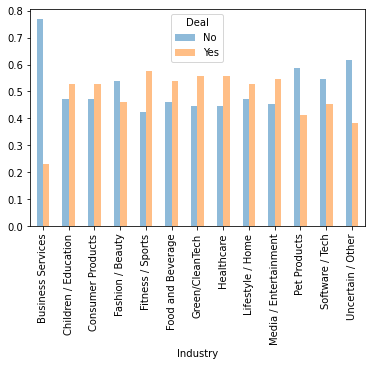

In [9]:

deal_per_industry = (tank.groupby("Industry")["Deal"].value_counts()).divide(tank.groupby("Industry")["Deal"].count())
deal_per_industry = deal_per_industry.unstack(level=1)

deal_per_industry.plot.bar(alpha = 0.5, legend = True)
deal_per_industry


In [10]:
deal_per_industry.unstack(level=1)["No"].idxmax(), deal_per_industry.unstack(level=1)["No"].max()


('Business Services', 0.7692307692307693)

In [11]:
deal_per_industry.unstack(level=1)["Yes"].idxmax(), deal_per_industry.unstack(level=1)["Yes"].max()      


('Fitness / Sports', 0.575)

**YOUR EXPLANATION HERE**

A company of the category **Business Services** has the highest rate of being not funded by the sharks within its own category. 

A company of the category **Fitness/Sports** has the highest rate of being funded within its own category.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2A - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.